# MAC0318 - Teoria de controle - Notebook 2

*Pré-requisitos*: 
- **Software**: Para rodar este notebook corretamente, você deve ter o Python na versão 3.9 ou mais recente e a biblioteca NumPy instalada. Antes de começar, assegure-se de que essas condições são satisfeitas.
- **Conhecimento**: Esta atividade assume familiaridade com o uso de notebooks Jupyter e a manipulação de matrizes usando a bilbioteca NumPy; também assumimos que você possui conhecimento de Cálculo (derivadas, integrais etc) e já encontrou sistemas equações diferenciais ordinárias antes (o suficiente para não se espantar ao ver uma!). Recomendamos seguir algum tutorial da internet antes de realizar essa atividade, se esse não for o seu caso.

<span style="color:blue">Se você está rodando o notebook em sala de aula, você deve ativar o ambiente `duckievillage` antes de abrir o jupyter notebook e escolher o kernel `duckievillage`, para que os requerimentos sejam satisfeitos.</red>

## Sistemas dinâmicos

Um *sistema* é informalmente uma coleção de objetos, componentes ou partes interdependentes cujo comportamento queremos estabelecer. Escolher quais componentes constituem o sistema (e quais serão vistos como elementos esternos ou *exógenos*) faz parte do projeto, modelagem e análise de sistemas. O sistema é *dinâmico* quando a interação ou as propriedades dos elementos que o constituem varia no tempo. Tais sistemas podem descrever fenômenos mais diversos: a posição relativa dos planetas no sistema solar, a tensão elétrica em pontos de circuito elétrico, as atividades dos neurônios cerebrais, a quantidade de sanduíches preparados em um restaurante *fast-food*, o funcionamento de um computador digital e, o que é nosso interesse aqui, a posição de um veículo.

Um *sinal* é algo que varia com o tempo, modelado como uma função de uma variável real $t \in [0,\infty]$. 
O *estado* descreve a configuração de todos os elementos do sistema em um determinado instante é seu estado, denominado por $x_t$. 
A *entrada* do sistema é algo que em geral *controlamos* ou *manipulamos*, e denominados ela pelo sinal $u_t$. A *saída* é em geral algo que estamos interessados em observar ou que conseguimos medir, denominada $y_t$. No caso mais simples, identificamos a saída com o estado. 
Matematicamente, descrevemos um sistema dinâmico por um conjunto de equações que determinam como o estado e a saída se alteram em função da entrada.
Sistemas de tempo contínuo (quando $t$ toma valores reais) são normalmente descritos por um sistema de equações diferenciais ordinárias (EDO) de primeira ordem, chamado de representação em *espaço de estados*:
$$
\dot{x}_t = f(x_t,u_t,t), \qquad y_t = g(x_t,u_t,t).
$$
Nessas equações, $x_t$, $u_t$ e $y_t$ são vetores e $f$ e $g$ são funções quaisquer de vetores em vetores (ou equivalentemente, um conjuto de funções). O vetor $\dot{x}_t$ descreve a derivada do estado no instante $t$. A solução desse sistema de EDOs fornece a evolução do sistema pelo sinal $x_t(u_t, x_0)$ como função exclusiva do sinal de entrada e das condições iniciais $x_0$. Por exemplo, considere o sistema 
$$
\dot{x}_t = -x_t .
$$
Sua solução analítica é
$$
x_t = x_0\cdot e^{-t} .
$$

Já sistemas de tempo discreto (ou seja, quando $t = 0,1,\ldots$) são normalmente descritos por equações de diferenças:
$$
x_{t+1} = f(x_t,u_t,t), \qquad y_t = g(x_t,u_t,t).
$$
Por exemplo, a quantidade de indíviduos $x_t$ de uma população a cada geração $t$ pode ser descrita como:
$$
x_t = x_{t-1} + x_{t-2},
$$
com $x_0 = 0$ e $x_1 = 1$. O sistema de recorrência acima possui como solução
$$
x_t = \frac{(1 + \sqrt{5})^t - (1 - \sqrt{5})^t}{2^t\sqrt{5}} .
$$

Um sistema dinâmico é *invariante no tempo* se para todo $t$ e $k$, temos:
$$
g(s,u,t+k) = g(s,u,t) \text{ e } f(s,u,t+k) = f(s,u,t).
$$

### Sistema massa-mola

<figure style='float:right'>
    <div style="text-align:center;">
        <img src="img/spring_mass.png" width="350" alt="spring-mass system">
    </div>
</figure>

Um exemplo simples porém suficientemente interessante de sistema dinâmico de tempo contínuo é a descrição da posição e velocidade de um objeto rígido com massa preso a uma mola, com uma de suas extremidades fixa. Tal sistema é chamado massa-mola ou também integrador duplo, devido a uma dupla integral de seu estado, como veremos. Considere portanto o sistema ilustrado na figura ao lado, com as seguintes definições:

- $m$: massa do corpo rígido [kg]
- $q$: distância do objeto à parede [m]
- $v$: velocidade do objeto [m/s]
- $a$: aceleração do objeto [m/s^2]
- $F_u$: força estimuladora [N]
- $C$: coeficiente de amortecimento linear
- $K$: constante elástica (stiffness) da mola

Vamos definir o estado como
$$
x_t = \begin{pmatrix} q_t \\ v_t \end{pmatrix}.
$$

Vamos supor que a força $F_u$ segue um sinal dado por $u_t$. De acordo com a segunda Lei de Newton, temos que:
$$
m\dot{v}_t = u_t - C v_t - K q_t
$$

Rearrajando termos e colocando em notação matricial, podemos representar o sistema dinâmico de tempo contínuo como a seguinte equação de transição no espaço de estados:
$$
 \begin{bmatrix}
 \dot{q} \\ \dot{v}
 \end{bmatrix}
 =
 \begin{bmatrix}
 0 & 1 \\ -K/m & -C/m
 \end{bmatrix}
  \begin{bmatrix}
  q \\ v
 \end{bmatrix}
 +
 \begin{bmatrix}
 0 \\ 1/m
 \end{bmatrix}
 u
$$
Note que o sistema acima descreve uma **transformação linear invariante** no tempo da forma $\dot{x} = f(x,u) = Ax + Bu$. Tais sistemas gozam de diversas propriedades importantes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definição dos parâmetros do sistema massa-mola 
# Constantes
K = 6.0  # constante elástica
C = 2.0  # amortecimento
m = 2.0    # massa [kg]
# Estado x = [q, v]
# Matriz de transição homogênea
A = np.matrix([[0, 1], [-K/m, -C/m]])
print('A =\n', A)
# Componente não-homogêneo
B = np.matrix([[0],[1/m]])
print('B =\n', B)

A =
 [[ 0.  1.]
 [-3. -1.]]
B =
 [[0. ]
 [0.5]]


## Resolução de sistemas dinâmicos

Um conjunto de EDOs pode ser resolvida analiticamente, quando obtemos uma forma fechada para $x_t$ em função de $u_t$ e $x_0$, ou numericamente, quando estimamos os valores de $x_t$ para um conjunto de instantes $t$ por meio de técnicas computacionais. Vamos exemplificar a resolução numérica do sistema massa-mola, usando o método de integração direto de Euler, que aproxima uma equação diferencial ordinária de primeira ordem por uma equação de diferenças também de primeira ordem, usando a identidade:
$$
x(t+\Delta t) = x(t) + \Delta t \cdot \dot{x}(t + \Delta t) \, ,
$$
onde $\Delta t$ é o passo de discretização de tempo (quanto menor mais correta a aproximação porém mais custosa computacionalmente). Note que de forma geral a aproximação só é exata quando $\Delta t$ tende a zero.

In [3]:
# Simulação do sistema massa-mola usando integração direta de Euler
def forward(x, u, dt):
    ' Calcula x(t+dt) em função de x(t), u(t) e passo dt > 0. '
    dx = A @ x + B * u
    x += dx*dt

In [4]:
# Vamos usar a função forward para simular a evolução do estado do sistema a partir
# de um estado inicial x = [0.2, 0] com 1200 passos de tempo dt = 0.01 [s] e um sinal de
# controle u=0.
dt = 0.01 # passo [s] -  deve ser pequeno o suficiente para amostrar a frequência de oscilação do sistema
# vamos guardar o histórico dos estados
q_hist = []
v_hist = []
t = []

x = np.array([[0.2], [0.0]]) # estado inicial x(0)
q_hist.append(x[0,0])
v_hist.append(x[1,0])
t.append(0.0)

for _ in range(1200):
    forward(x, 0.0, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0])
    t.append(t[-1]+dt)  

Vamos visualizar a trajetória do sistema, mostrando as variáveis de estado em função do tempo

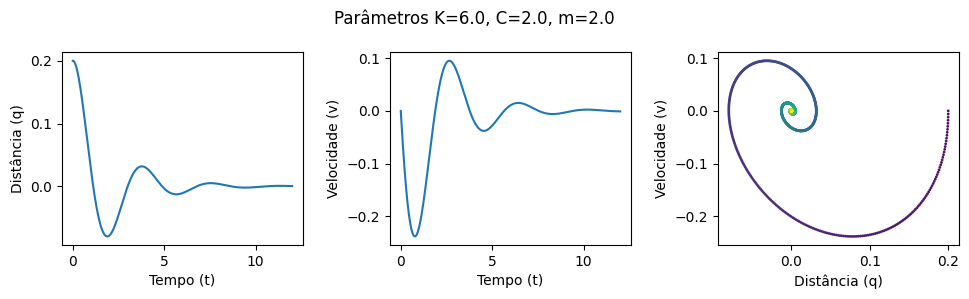

In [5]:
def show_trajectories(q_hist, v_hist, t):
    ' Mostra trajetórias de distância e velocidade versus tempo'
    _, ax = plt.subplots(1,3, figsize=(10,3))
    ax[0].plot(t,q_hist);
    ax[0].set_ylabel('Distância (q)');
    ax[0].set_xlabel('Tempo (t)');
    ax[1].plot(t,v_hist);
    ax[1].set_ylabel('Velocidade (v)');
    ax[1].set_xlabel('Tempo (t)');
    ax[2].scatter(q_hist,v_hist, s=1, alpha=0.9, c=t);
    ax[2].set_ylabel('Velocidade (v)');
    ax[2].set_xlabel('Distância (q)');
    plt.suptitle(f"Parâmetros K={K}, C={C}, m={m}")
    plt.tight_layout()

show_trajectories(q_hist, v_hist, t)

🤔  Pause um pouco e reflita sobre as curvas acima e o que elas significam em termos do comportamento do sistema físico massa-mola.
O último gráfico, em particular, contém o tempo implicitamente e determina como uma variável de estado se modificou em função da outra.

Depois, modifique o valor da constante elástica $K$ e simule novamente o comportamento do sistema, tentando relacionar os gráficos ao comportamento físico. Teste com $K=0.6$ e $K=60$. Quando terminar, retorne aos valores iniciais (rodando o código abaixo).

In [6]:
m = -2
K = 60  # constante elástica
A = np.matrix([[0, 1], [-K/m, -C/m]])
print('A =\n', A)

A =
 [[ 0.  1.]
 [30.  1.]]


## Estabilidade de sistemas dinâmicos

Há muitas formas de definir establidade de um sistema dinâmico. A mais comum é a que mede a estabilidade pela finitude da saída, chamado em inglês de [*Bounded-Input, Bounded-Output* (BIBO)](https://en.wikipedia.org/wiki/BIBO_stability). De acordo com esse conceito, um sistema descrito por estados $x_t$ é BIBO-estável se sua saída é limitada sempre que sua entrada também o for. Um sinal $s_t$ é limitado se existe uma constante $B > 0$ que limita superiormente a magnitude do sinal isto é, se $|s_t| < B$ para qualquer $t > 0$. Por exemplo, o sistema de tempo contínuo descrito pela equação 
$$
x_t = e^{-t} u_t
$$ 
é BIBO-estável, pois para $|u_t| < C$ temos que $|x_t| < C$ para qualquer $C > 0$. Note que o sistema não é limitado para $u_t = e^{2t}$, porém esse sinal de entrada também não é limitado (e portanto não viola a propriedade de BIBO-estabilidade do sistema). Agora considere o sistema descrito por
$$
x_t = 2t + u_t .
$$
Tal sistema não é BIBO-estável, pois nesse caso mesmo para $u_t=0$ temos para qualquer $C$ um $t$ suficientemente grande tal que $|x_t| > C$. 
Muitas vezes, a BIBO-estabilidade depende das condições iniciais de sistema. Nesse caso, é comum estabelecer BIBO-estabilidade assumindo condições iniciais nulas ($x_0 = 0$). Para sistemas forçados descritos por $\dot{x}_t = f_1(x_t,t) + f_2(u_t,t)$, também é comum estabelecer BIBO-estabilidade considerando um ponto estacionário $x_0=x^*$ da versão não-forçada do sistema $\dot{x}_t = f_1(x_t,t)$). Um **ponto estacionário** ou de equilíbrio $x^*$ para uma função $\dot{x} = f(x,t)$ é tal que $f(x^*,t) = 0$ para todo $t$. Em tal ponto, portanto, o sistema se torna estático e seu estado não se altera (na ausência de estímulos externos ou de entrada).

## 💡 Exercício 1

Determine um ponto estacionário para o sistema massa-mola não-forçado $\dot{x}_t = A x_t$ com a matriz $A$ dada acima. Demonstre por meio da simulação que o sistema de fato se encontra em equilíbrio quando $x_0 = x^*$.

### RESPOSTA

Temos um ponto estacionário $x^{*} = (0,0)$

In [7]:
# Simulação do ponto estacionário:
# FAZER:
dt = 0.01 # passo [s] -  deve ser pequeno o suficiente para amostrar a frequência de oscilação do sistema
# vamos guardar o histórico dos estados
q_hist = []
v_hist = []
t = []

x = np.array([[0.0], [0.0]]) # estado inicial x(0)
q_hist.append(x[0,0])
v_hist.append(x[1,0])
t.append(0.0)

for _ in range(1200):
    forward(x, 0.0, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0])
    t.append(t[-1]+dt)  

# mostrando que o sistema não sai do lugar, fica em equilíbrio
print(sum(q_hist))
print(sum(v_hist))

0.0
0.0


## 💡 Exercício 2

Considere o sistema massa-mola não forçado descrito por $\dot{x}_t = Ax_t$ sendo $x_0$ um ponto inicial qualquer. Tal sistema é BIBO-estável? **Justifique sua resposta**, apontando porque o estado descrito pelo sistema será limitado ou apontando um contra-exemplo. Você pode usar as simulações das função `forward` como aproximações da dinâmica verdadeira do sistema para justificar sua resposta.

### RESPOSTA

<span>O sistema massa-mola é assintoticamente estável com amortecimento e marginalmente estável sem amortecimendto. Sendo assim, ele é BIBO-estável. Entretanto, o nosso modelo matemático do sistema massa-mola pode se tornar instável se usamos parâmetros impossíveis segundo a física.</span>

<span>Por exemplo, se alguma constante K, C ou m for negativa, o sistema ganha energia ao longo do tempo em vez de perder, fazendo com que os valores simulados "explodam"</span>

In [8]:
# testar colocando valores negativos
K = 6.0  # constante elástica
C = 2.0  # amortecimento
m = 2.0    # massa [kg]


A = np.matrix([[0, 1], [-K/m, -C/m]])
B = np.matrix([[0],[1/m]])

dt = 0.01
q_hist = []
v_hist = []
t = []

x = np.array([[0.4], [0.4]])
q_hist.append(x[0,0])
v_hist.append(x[1,0])
t.append(0.0)

for _ in range(12000):
    forward(x, 0.0, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0])
    t.append(t[-1]+dt)  

# explode se alguma constante é negativa
print(max(q_hist))
print(max(v_hist))

0.4537349575191507
0.4


## Sistemas forçados e não forçados

A modelagem matemática de um sistema nos permite compreender a influência de certos parâmetros e entradas em seu comportamento, e também de encontrar uma função de entrada que leve o sistema a um comportamento adequado. Uma propriedade crucial, por exemplo, é estabelecer uma função de controle que torne um sistema instável em um sistema estável, ou evitar que uma regra de controle torne um sistema estável em um sistema instável. Nessa finalidade, enxergamos um sistema com uma sinal de controle fixo como um novo sistema (não-forçado), o qual podemos analisar propriedades como estabilidade, ponto de equilíbrio etc.

Por exemplo, podemos investigar o sistema massa-mola descrito acima quando a entrada é a constante unitária $u_t = 1$. Para esse sistema temos o seguinte ponto estacionário
$$
A x^* + B = 0 \Rightarrow x^* = -A^{-1}B .
$$

In [9]:
# Ponto estacionário do sistema não-forçado correspondente
xstar = -(np.linalg.inv(A) @ B) 
print('x* =', xstar.T)

x* = [[ 0.16666667 -0.        ]]


0.16666666666666669 -9.95571775650897e-18


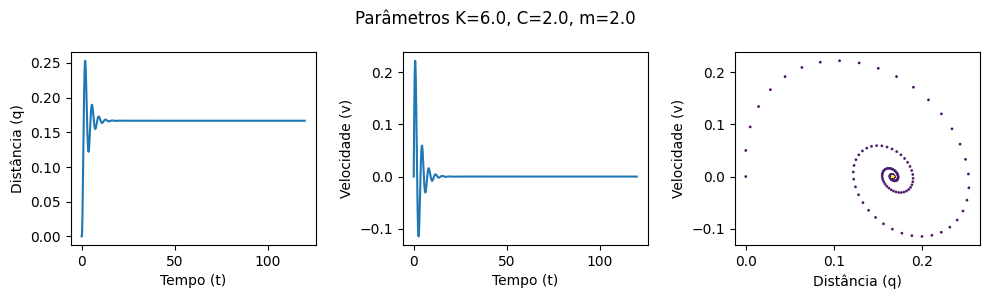

In [10]:
# Vamos simular a evolução do sistema acima a partir de um
# estado inicial estacionário com 120 passos de tempo dt = 0.1 [s]
dt = 0.1 # passo [s]
# vamos guardar o histórico dos estados
q_hist = []
v_hist = []
t = []

x = np.zeros((2,1))
q_hist.append(x[0,0])
v_hist.append(x[1,0])  

t.append(0.0)

def forward(x, u, dt):
    ' Calcula x(t+dt) em função de x(t), u(t) e passo dt > 0. '
    dx = A @ x + B * u
    x += dx*dt

for _ in range(1200): # alterado para convergir mais para x^{*}
    forward(x, 1.0, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0])
    t.append(t[-1]+dt)  

show_trajectories(q_hist, v_hist, t)
print(q_hist[-1], v_hist[-1]) # mostra que de fato chegamos no ponto de equilíbrio

Podemos também efetuar o raciocínio inverso e determinar qual sinal de controle é necessário para que o sistema convirja para um dado ponto de equilíbrio.

## 💡 Exercício 3

Modifique a função `control` abaixo para que o sistema convirga para o ponto $x = \begin{pmatrix} 1 & 0 \end{pmatrix}$ a partir do ponto de equilíbrio $x_0 = 0$.

In [11]:
# Lei de controle para que sistema convirja para x = [1 0]

# lembrando que x é um vetor e u_{t} é um escalar
# A = np.matrix([[0, 1], [-K/m, -C/m]])
# B = np.matrix([[0],[1/m]])
# A*x^{*}+B*u_{t}=0
# A*(1,0)+B*u_{t}=0
# (0, -K/m) + (0, 1/m)*u_{t}=0
# \frac{-K+u_{t}}{m}=0
# u_{t} = K
# print(K)

def control(x, t):
    ' Lei de controle u(t,x)'
    return K


1.0007064486890582
-7.739999595317125e-06


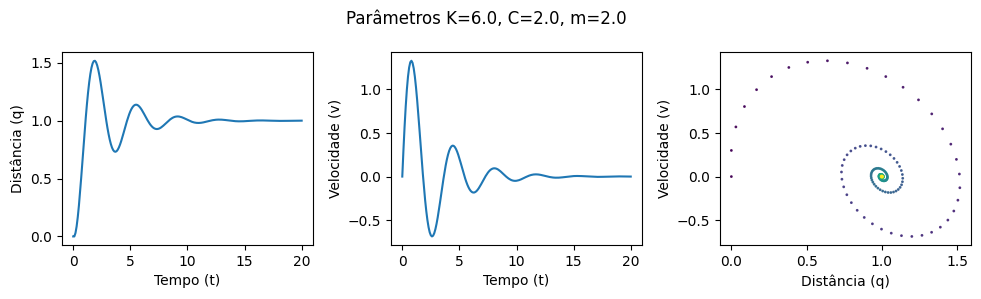

In [12]:
# Vamos simular a evolução do sistema forçado a partir de um
# estado inicial estacionário com 200 passos de tempo dt = 0.1 [s]
dt = 0.1 # passo [s]
# vamos guardar o histórico dos estados
q_hist = []
v_hist = []
t = []

x = np.zeros((2,1))
q_hist.append(x[0,0])
v_hist.append(x[1,0])  
t.append(0.0)

for _ in range(200):
    u = control(x, t[-1]) # nesse caso poderiamos determinar um sinal de controle constante fora do loop de simulação
    forward(x, u, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0]) 
    t.append(t[-1]+dt)  

show_trajectories(q_hist, v_hist, t)
print(q_hist[-1])
print(v_hist[-1])

## Sistema massa-mola instável

Vamos usar uma constante de amortecimento negativa (!) para tornar o sistema massa-mola para BIBO-instável.

In [13]:
# Definição dos parâmetros do sistema massa-mola não amortecido (instável)
# Constantes
K = 6.0  # constante elástica 
C = -1.0  # amortecimento
m = 2.0  # massa [kg]
# Estado x = [q, v]
# Matriz de transição homogênea
A = np.matrix([[0, 1], [-K/m, -C/m]])
print('A =\n', A)
# Componente não-homogêneo
B = np.matrix([[0],[1/m]])
print('B =\n', B)

A =
 [[ 0.   1. ]
 [-3.   0.5]]
B =
 [[0. ]
 [0.5]]


In [14]:
# O sistema não-forçado é instável quando a parte real dos autovalores da matriz A são positivas
np.linalg.eigvals(A)

array([0.25+1.71391365j, 0.25-1.71391365j])

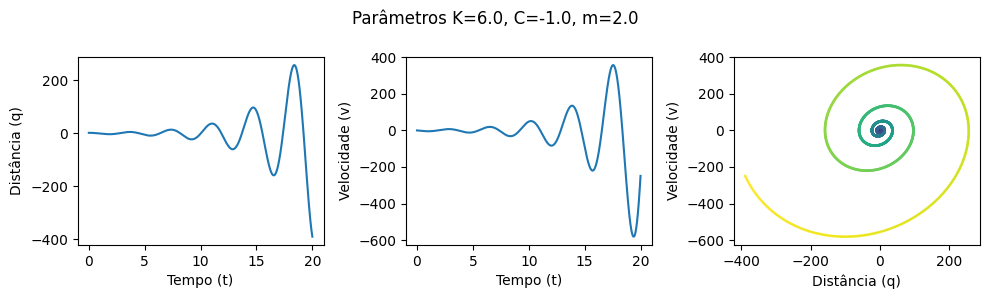

In [15]:
# Vamos simular a evolução do sistema não-forçado acima a partir de
# um estado inicial não-estacionário com 2000 passos de tempo dt = 0.01 [s]
dt = 0.01 # passo [s]
# vamos guardar o histórico dos estados
q_hist = []
v_hist = []
t = []

x = np.matrix([[2.0], [0.0]]) # vamos começar de um ponto de não equilíbrio
q_hist.append(x[0,0])
v_hist.append(x[1,0])  
t.append(0.0)

for _ in range(2000):
    u = 0.0 # control(x, t[-1])
    forward(x, u, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0]) 
    t.append(t[-1]+dt)  

show_trajectories(q_hist, v_hist, t)

## Estabilização e Retroalimentação

Um uso importante da modelagem de sistemas dinâmicos é o de projetar um sinal de controle que estabilize um sistema instável. Para nosso sistema massa-mola, queremos encontrar $u_t$ que faça o sistema não-forçado equivalente convergir a um estado de equilíbrio a partir de possíveis condições iniciais. Vamos procurar por uma lei de controle linear de **retroalimentação**:
$$
u_t = K_u x_t .
$$
A regra acima é retroalimentada pois define a *entrada* em função do estado (saída) do sistema. Ela é linear pois define uma transformação linear do estado. 
Colocando tal equação nas EDO do sistemas, chegamos a equação de nosso sistema controlado não-forçado equivalente:
$$
\dot{x}_t = (A+B K_u)x_t = A' x_t.
$$
Assumindo que $\det A \neq 0$, o único ponto de equilíbrio de tal sistema é
$$
x^* = 0 .
$$
Isso não garante estabilidade do sistema, pois tal ponto pode ser **estável** ou **instável**, a depender da solução inicial. A figura abaixo ilustra dois tipos de pontos de equilíbrios: o ponto do topo da colina é instável enquanto o ponto da base do vale é assintoticamente estável.

<figure>
    <div style="text-align:center;">
        <img src="img/equilibria.png" width="350" alt="equilibria points">
    </div>
</figure>

Quando o sistema é instável, queremos encontrar a matriz $K_u$ de *ganho do controlador* que torne o sistema estável. A teoria de sistemas lineares prescreve métodos para encontrar tais constantes de maneira automática. No entanto, para nossos fins, vamos **determinar a matriz de ganho do controlador por tentativa-e-erro**.

## 💡 Exercício 4

Encontre uma matriz $K_u = \begin{pmatrix} 0 & c \end{pmatrix}$ que faça o sistema convergir para o ponto de equilíbrio a partir da solução inicial $x_0 = \begin{pmatrix} 2 & 0 \end{pmatrix}$.

In [16]:
# Lei de controle linear retroalimentada
Ku = np.matrix([[0.0, -10]]) 
# Encontre o valor da segunda coordenada da matriz acima
# que faça o sistema convergir (deixe a primeira = 0)

print('Ku =', Ku)

# um sistema estável possui a parte real dos autovalores < 0
print('autovalores = ', np.linalg.eigvals(A+B @ Ku)) 

def control(x, t):
    ' Lei de controle u(t,x)'
    return Ku @ x

Ku = [[  0. -10.]]
autovalores =  [-0.81385934 -3.68614066]


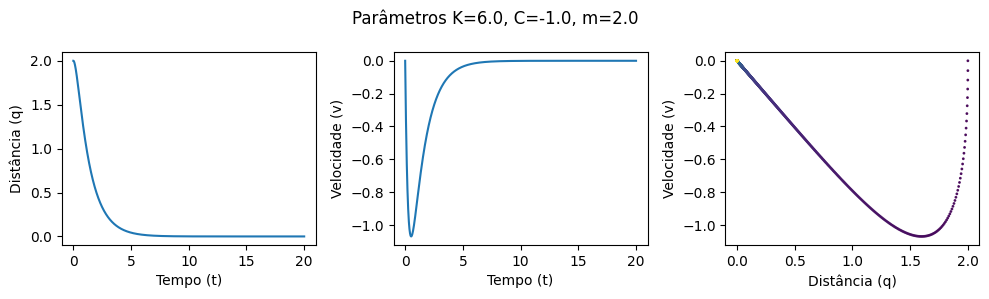

In [17]:
# Vamos simular a evolução do sistema não forçado acima a partir
# de um estado inicial não-estacionário com 2000 passos de tempo dt = 0.01 [s]
dt = 0.01 # passo [s]
# vamos guardar o histórico dos estados
q_hist = []
v_hist = []
t = []

x = np.matrix([[2.0], [0.0]]) # vamos começar de um ponto de não equilíbrio (senão o problema de controle é trivial)
q_hist.append(x[0,0])
v_hist.append(x[1,0])  
t.append(0.0)


for _ in range(2000):
    u = control(x, t[-1])
    forward(x, u, dt)
    q_hist.append(x[0,0])
    v_hist.append(x[1,0]) 
    t.append(t[-1]+dt)  

show_trajectories(q_hist, v_hist, t)